#### demo: Recipe for calculating WB

In [1]:
import sys, os, gsw
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xarray import open_dataset
import warnings
warnings.filterwarnings("ignore")

sys.path.append(os.path.abspath("../scripts"))
from buoyancy_potential_work import buoyancy_potential_work

1. Load data

In [2]:
file = "aoml/1900194/profiles/D1900194_120.nc"
urllib.request.urlretrieve(f'ftp://ftp.ifremer.fr/ifremer/argo/dac/{file}', f'data/{file.replace("/", "_")}')

data = open_dataset(f'data/{file.replace("/", "_")}')
data

<xarray.Dataset> Size: 5kB
Dimensions:                       (N_PROF: 1, N_PARAM: 3, N_LEVELS: 51,
                                   N_CALIB: 1, N_HISTORY: 3)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    PLATFORM_NUMBER               (N_PROF) object 8B ...
    PROJECT_NAME                  (N_PROF) object 8B ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object 24B ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object 24B ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 12B ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 12B ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 12B ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 24B ...
Attributes:
    title:                Argo float vertical profile
    institution:          AOML
    source:               Argo float
    history:              2015-Mar-4 converted from 2.2 to 3.1 at UW
    references:           http://www.argodatamgt.org/Documentation
    comment:              free text
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

2. Define variables and use TEOS-10 

In [3]:

latitude = data.LATITUDE.data[0]
longitude = data.LONGITUDE.data[0]
pres = data.PRES_ADJUSTED.data[0]
temp = data.TEMP_ADJUSTED.data[0]
psal = data.PSAL_ADJUSTED.data[0]

asal = gsw.SA_from_SP(psal, pres, longitude, latitude)
ctemp = gsw.CT_from_t(asal, temp, pres)
rho = gsw.density.sigma0(asal, ctemp)
z_rho = gsw.z_from_p(pres, latitude)

3. Compute the Work done by buoyancy

In [4]:
wb, z_wb = buoyancy_potential_work(rho, z_rho)
wb

array([-1.00478659e-02,  4.05522724e-04, -0.00000000e+00,  4.08204540e-02,
       -1.86606213e-02, -1.17089300e-01, -2.07046269e-01, -4.90962453e-01,
       -3.60837995e-01, -2.80285026e-01, -1.89307737e-01, -1.90248773e-01,
        5.43058261e-01,  6.98512611e-01,  7.12858114e-01,  2.29311025e+01,
        4.06458410e+01,  4.92761813e+01,  5.53180036e+01,  5.73661280e+01,
        6.05703425e+01,  6.80912891e+01,  8.47586930e+01,  9.89320811e+01,
        1.07005459e+02,  1.30039486e+02,  1.50940069e+02,  1.67584469e+02,
        1.92801538e+02,  1.98642109e+02,  2.26885231e+02,  2.51852346e+02,
        2.65953692e+02,  2.98119841e+02,  3.21384916e+02,  3.49258957e+02,
        3.69835432e+02,  3.73849351e+02,  4.40125701e+02,  5.22452767e+02,
        6.72373789e+02,  8.07927833e+02,  9.99414969e+02,  1.28858917e+03,
        1.53133670e+03,  1.75189671e+03,  2.02175753e+03,  2.23064336e+03,
        2.41689490e+03,  2.64508345e+03,  2.85643796e+03,  3.07848494e+03])

4. Figure

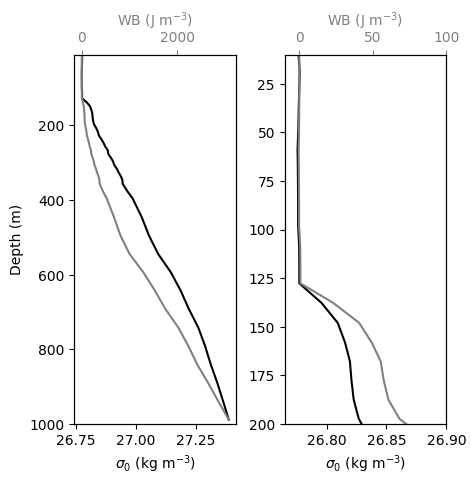

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(4.8, 4.8))

axs[0].plot(rho, z_rho*-1, c='black')
axs[0].set_xlabel(r"$\sigma_0$ (kg m$^{-3}$)")
axs[0].set_ylim(1000, 10)
axs[0].set_ylabel(r"Depth (m)")

ax2 = axs[0].twiny()
p1 = ax2.plot(wb, z_wb*-1, c="gray")
ax2.set_xlabel(r'WB (J m$^{-3}$)')
ax2.set_ylim(1000, 10)
ax2.xaxis.label.set_color(p1[0].get_color())
ax2.tick_params(axis='x', colors=p1[0].get_color())

axs[1].plot(rho, z_rho*-1, c='black')
axs[1].set_xlabel(r"$\sigma_0$ (kg m$^{-3}$)")
axs[1].set_xlim(26.765, 26.9)
axs[1].set_ylim(200, 10)

ax2 = axs[1].twiny()
p1 = ax2.plot(wb, z_wb*-1, c="gray")
ax2.set_xlabel(r'WB (J m$^{-3}$)')
ax2.set_xlim(-10, 100)
ax2.set_ylim(200, 10)
ax2.xaxis.label.set_color(p1[0].get_color())
ax2.tick_params(axis='x', colors=p1[0].get_color())

fig.subplots_adjust(wspace=0.3)
